In [17]:
install.packages("forecast")

Installing package into ‘/home/lyes/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [18]:
# Define the plot size
options(repr.plot.width = 24, repr.plot.height = 12)

# Import libraries
library(ggplot2)
library(MASS)
library(forecast)

First 5 rows of data:
        Date Close.Price..USD.
1 2014-09-17           457.334
2 2014-09-18           424.440
3 2014-09-19           394.796
4 2014-09-20           408.904
5 2014-09-21           398.821

Dataset info:
'data.frame':	3758 obs. of  2 variables:
 $ Date             : Date, format: "2014-09-17" "2014-09-18" ...
 $ Close.Price..USD.: num  457 424 395 409 399 ...

Summary statistics:
      Date            Close.Price..USD. 
 Min.   :2014-09-17   Min.   :   178.1  
 1st Qu.:2017-04-13   1st Qu.:  1224.9  
 Median :2019-11-08   Median :  9349.5  
 Mean   :2019-11-08   Mean   : 19566.2  
 3rd Qu.:2022-06-04   3rd Qu.: 30540.1  
 Max.   :2024-12-30   Max.   :106140.6  


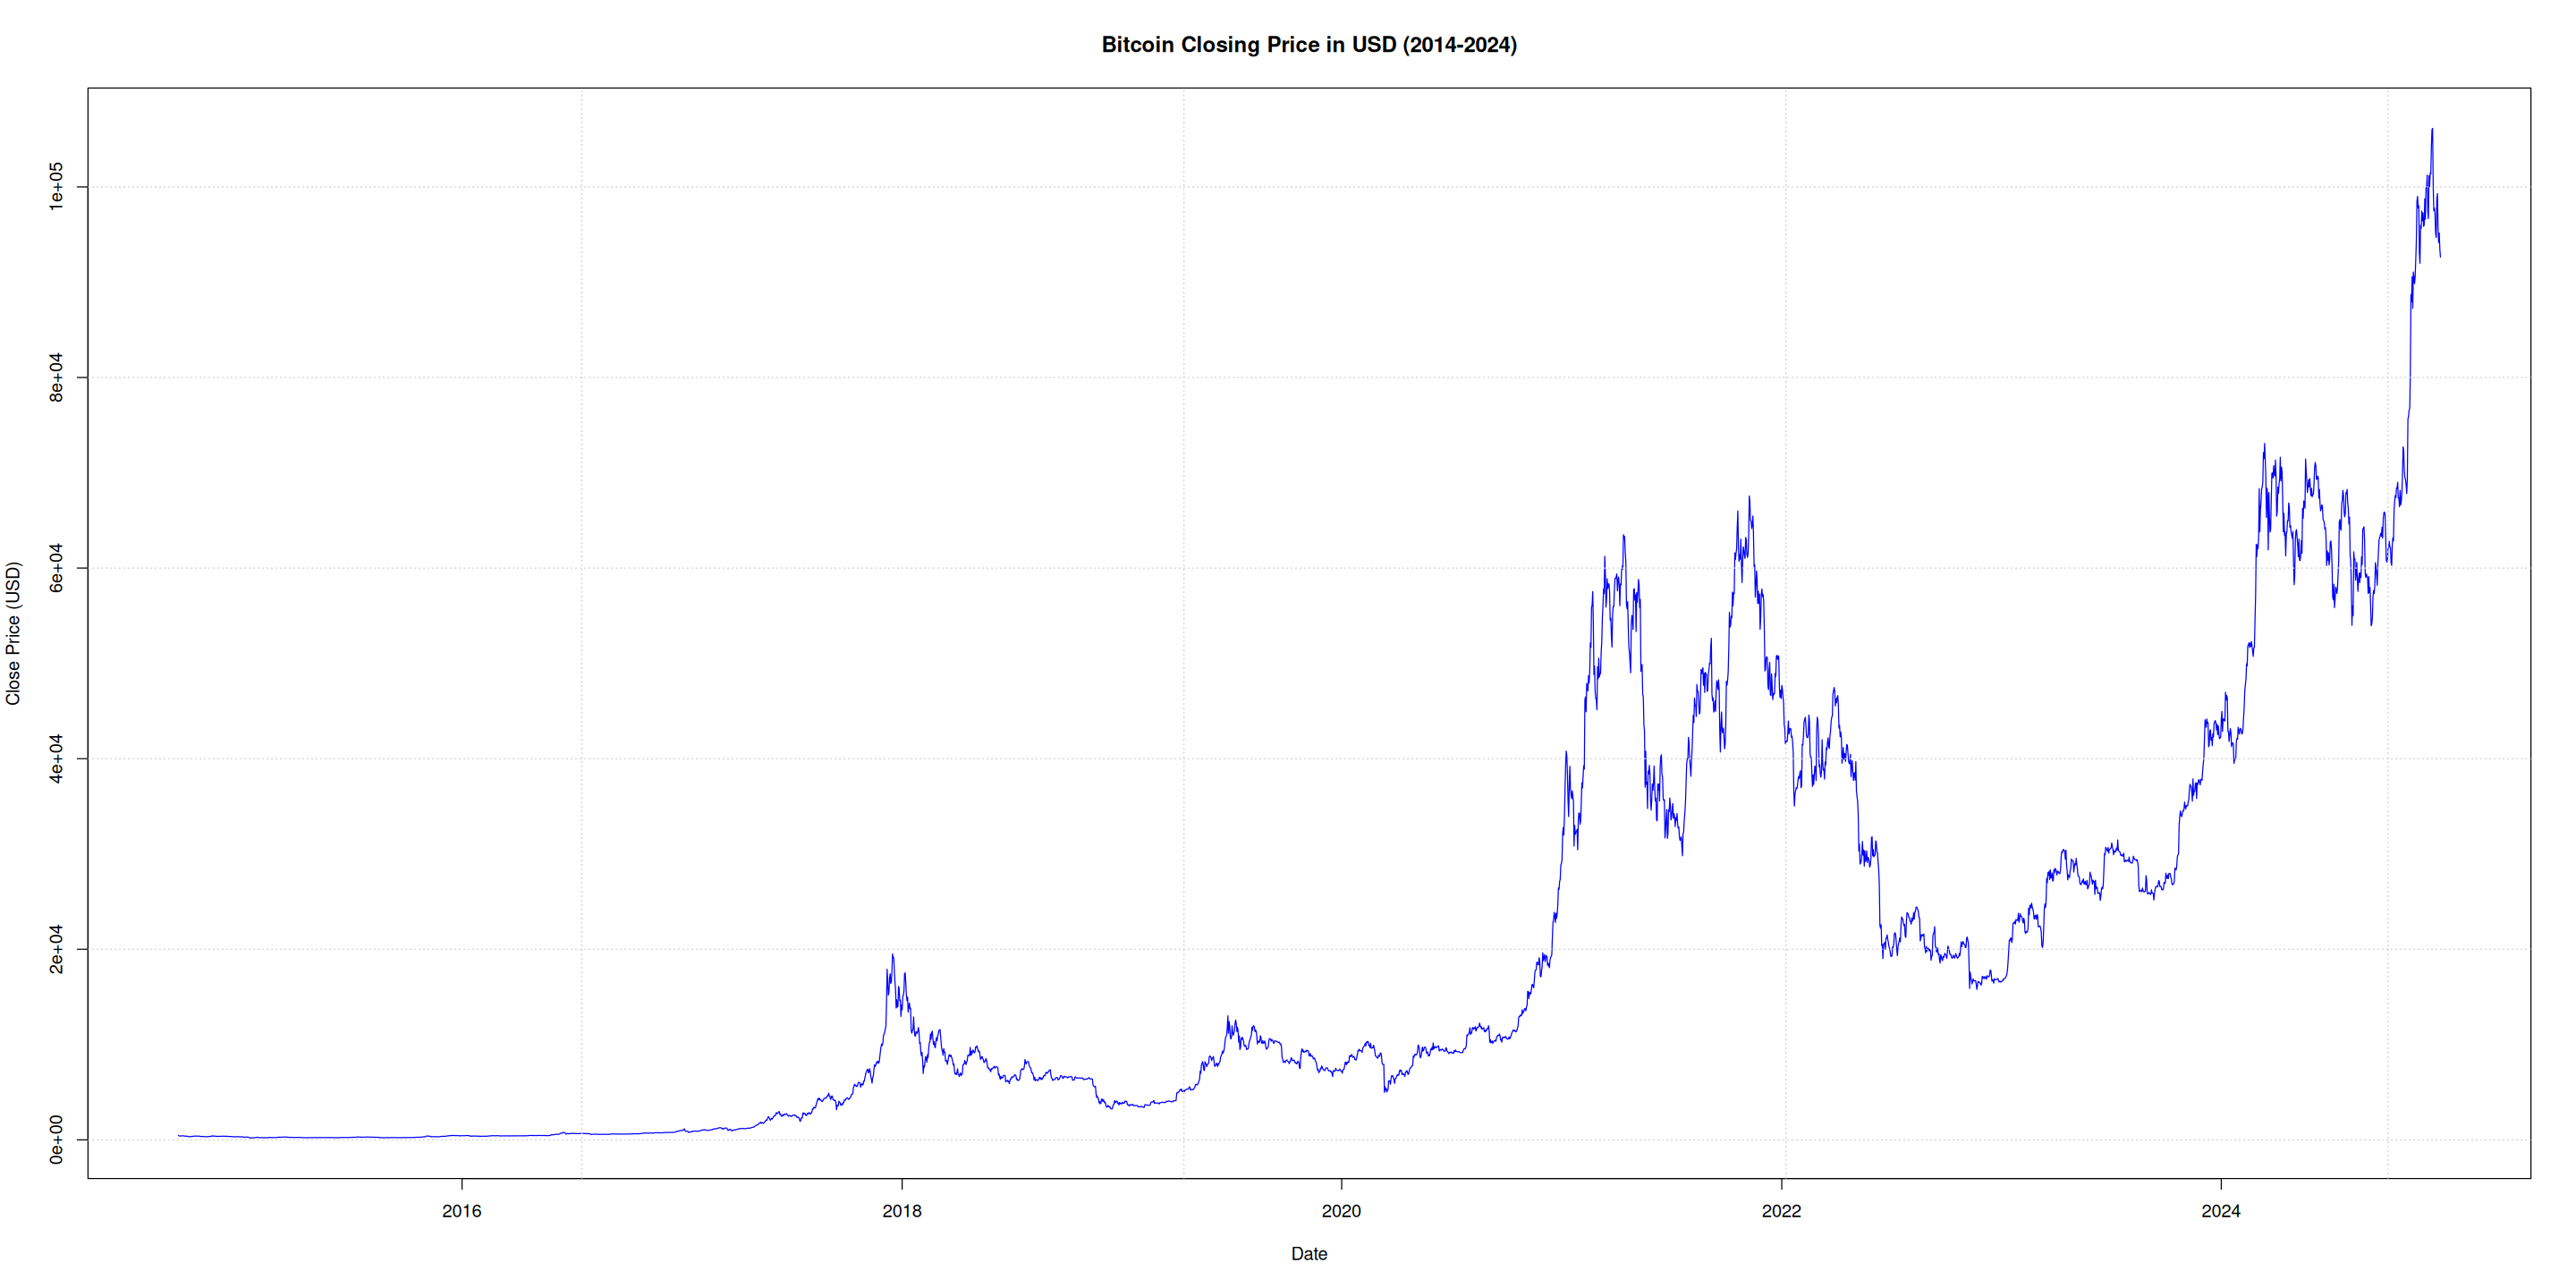

In [19]:
# Load the Bitcoin data
bitcoin_data <- read.csv("../data/bitcoin_data.csv")

# Convert the Date column to Date format
bitcoin_data$Date <- as.Date(bitcoin_data$Date)

# Display the first few rows
cat("First 5 rows of data:\n")
print(head(bitcoin_data, 5))

# Display basic information about the dataset
cat("\nDataset info:\n")
str(bitcoin_data)

# Display summary statistics
cat("\nSummary statistics:\n")
print(summary(bitcoin_data))


# Plot the Bitcoin closing price
par(bg = "white")
plot(bitcoin_data$Date, bitcoin_data$Close, 
     type = "l",
     main = "Bitcoin Closing Price in USD (2014-2024)",
     xlab = "Date",
     ylab = "Close Price (USD)",
     col = "blue",
     lwd = 1)
grid()

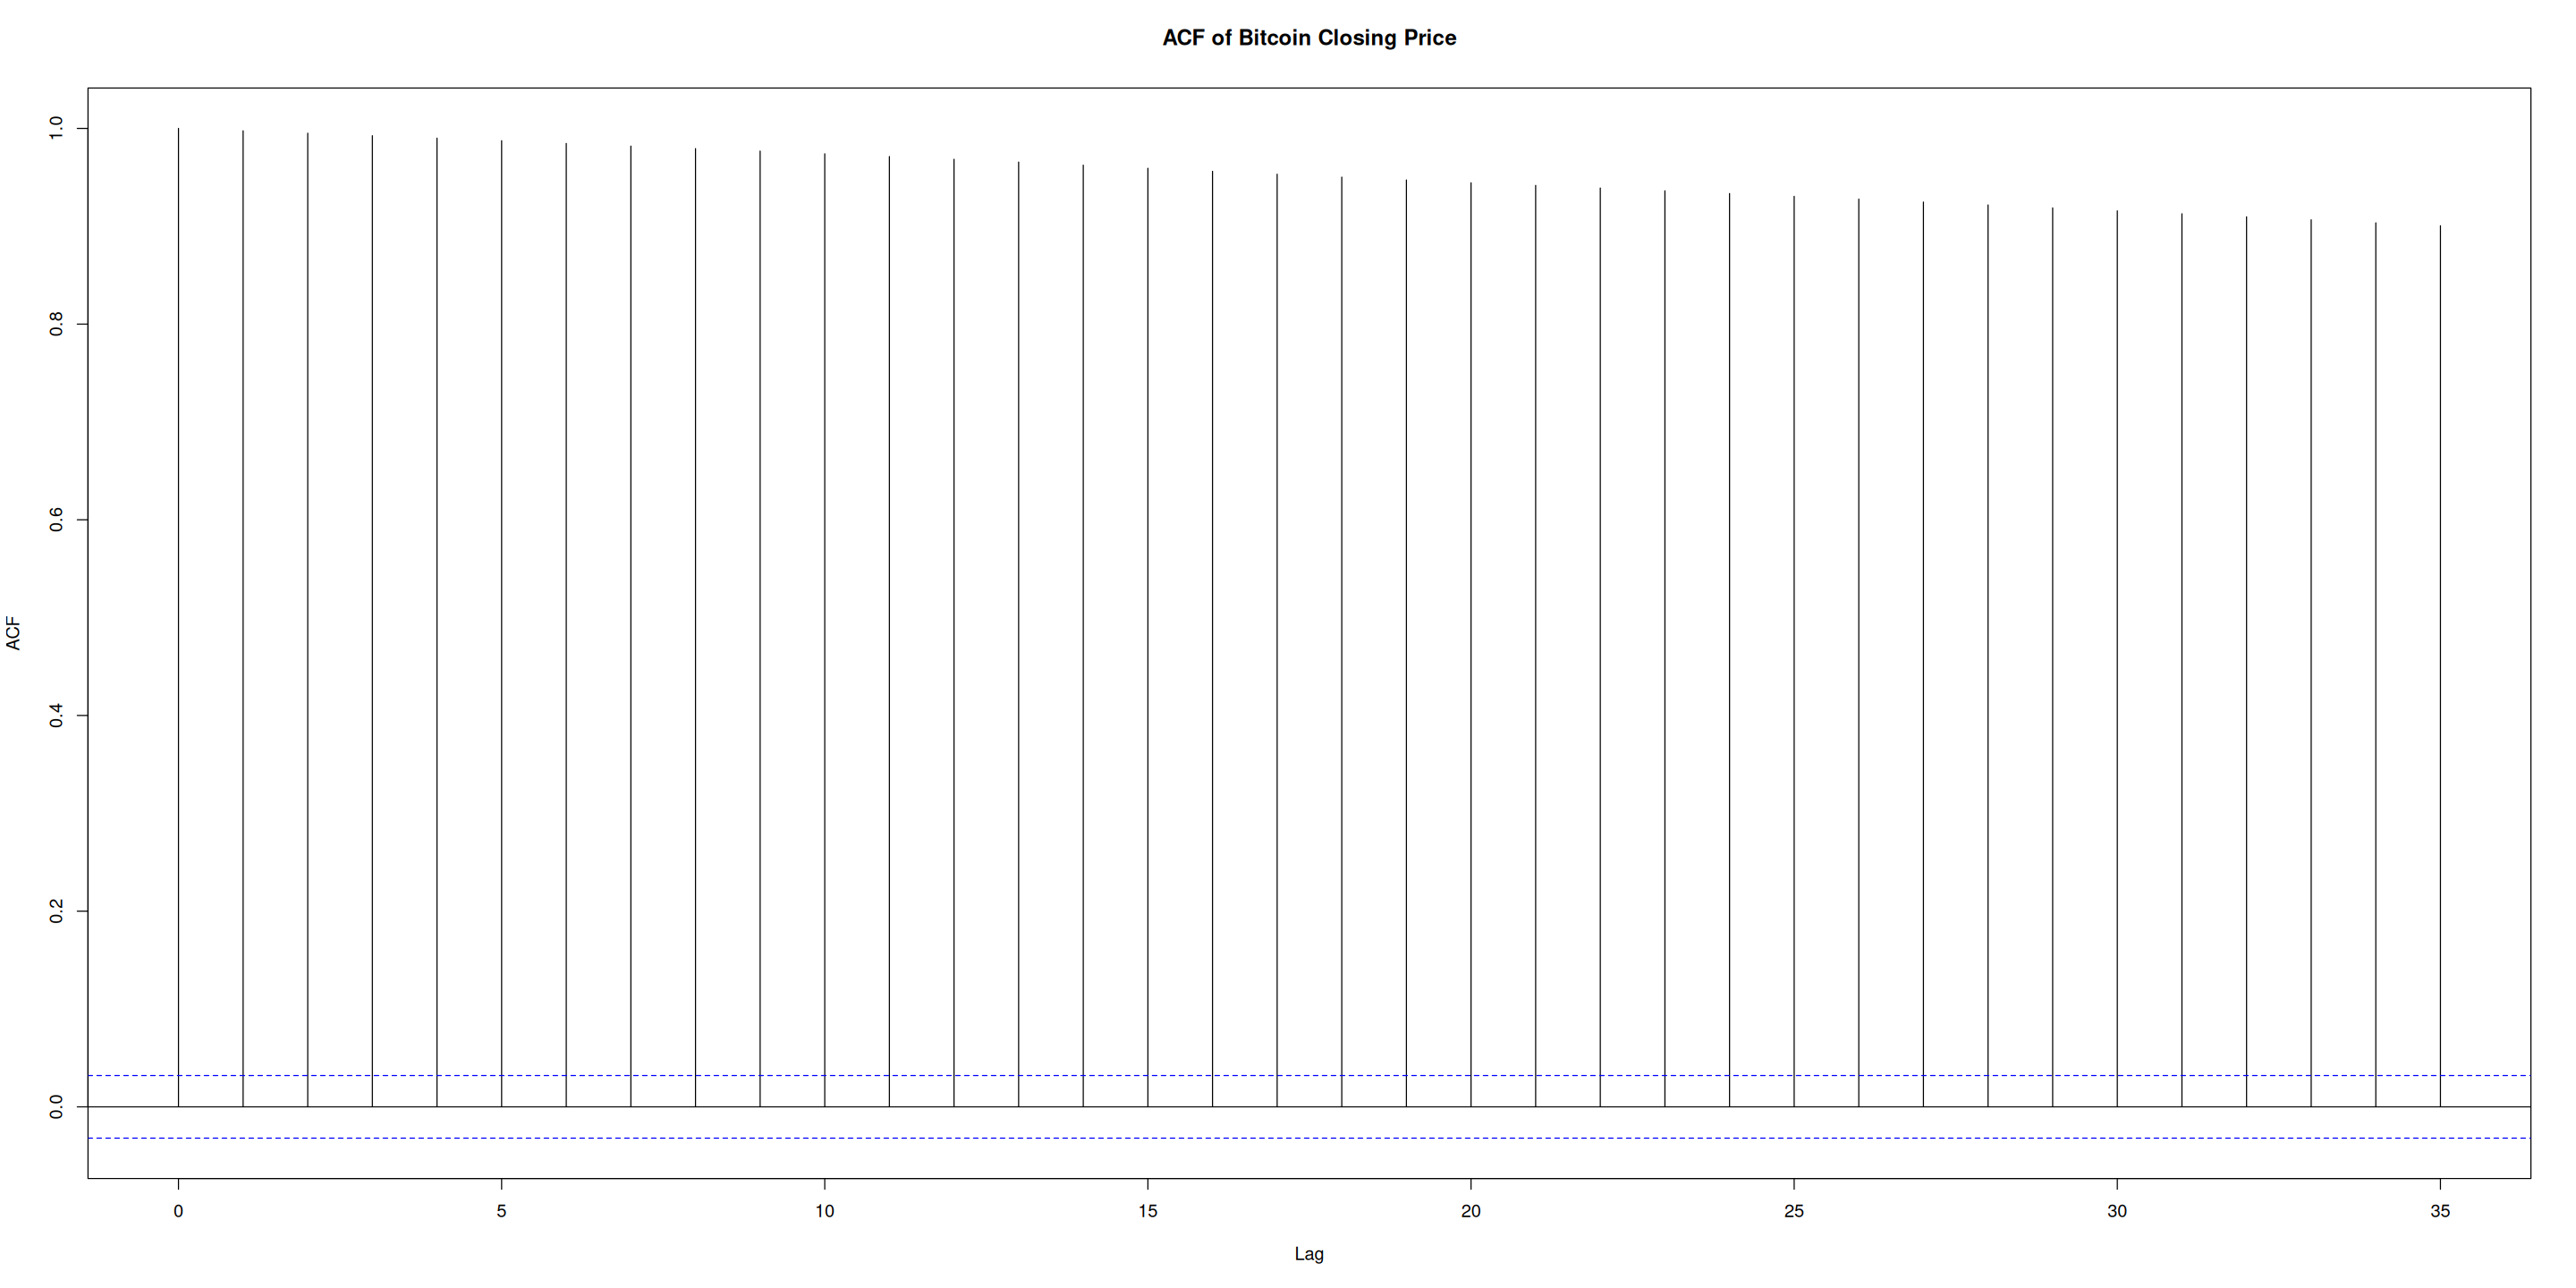

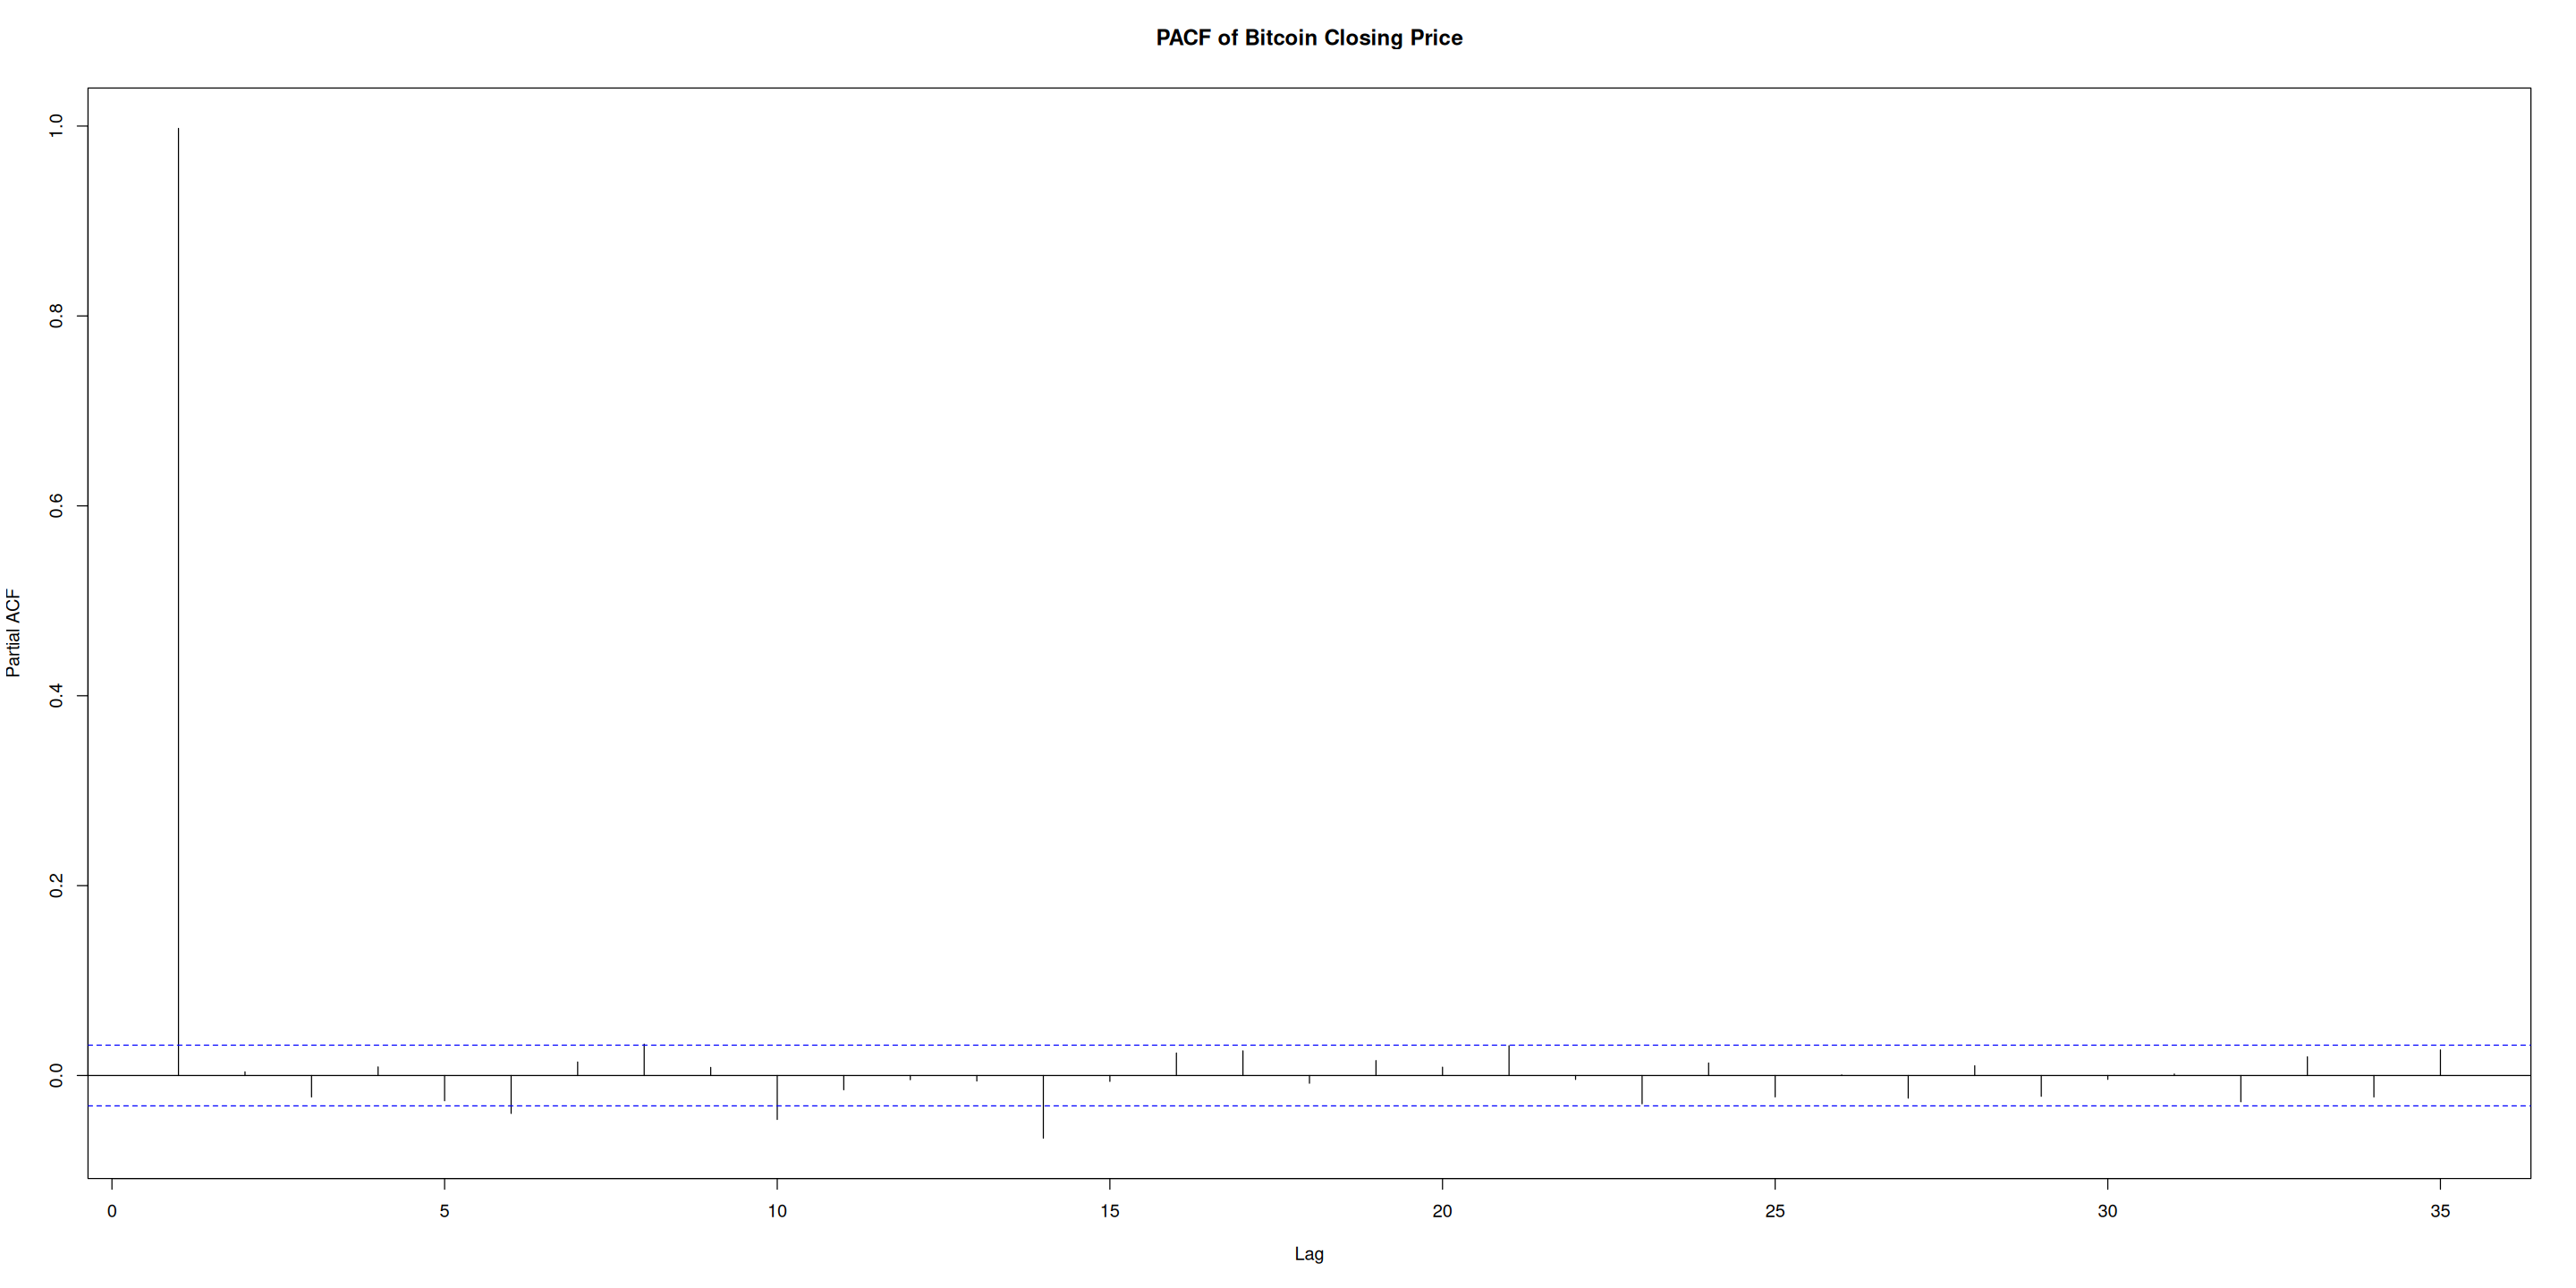

In [20]:
# ACF plot
par(bg = "white")
acf(bitcoin_data$Close, main = "ACF of Bitcoin Closing Price")
pacf(bitcoin_data$Close, main = "PACF of Bitcoin Closing Price")


In [21]:
# Augmented Dickey-Fuller test
library(tseries)
adf.test(bitcoin_data$Close)


	Augmented Dickey-Fuller Test

data:  bitcoin_data$Close
Dickey-Fuller = -1.4842, Lag order = 15, p-value = 0.7967
alternative hypothesis: stationary



Optimal lambda for Box-Cox transformation: 0.04334072 


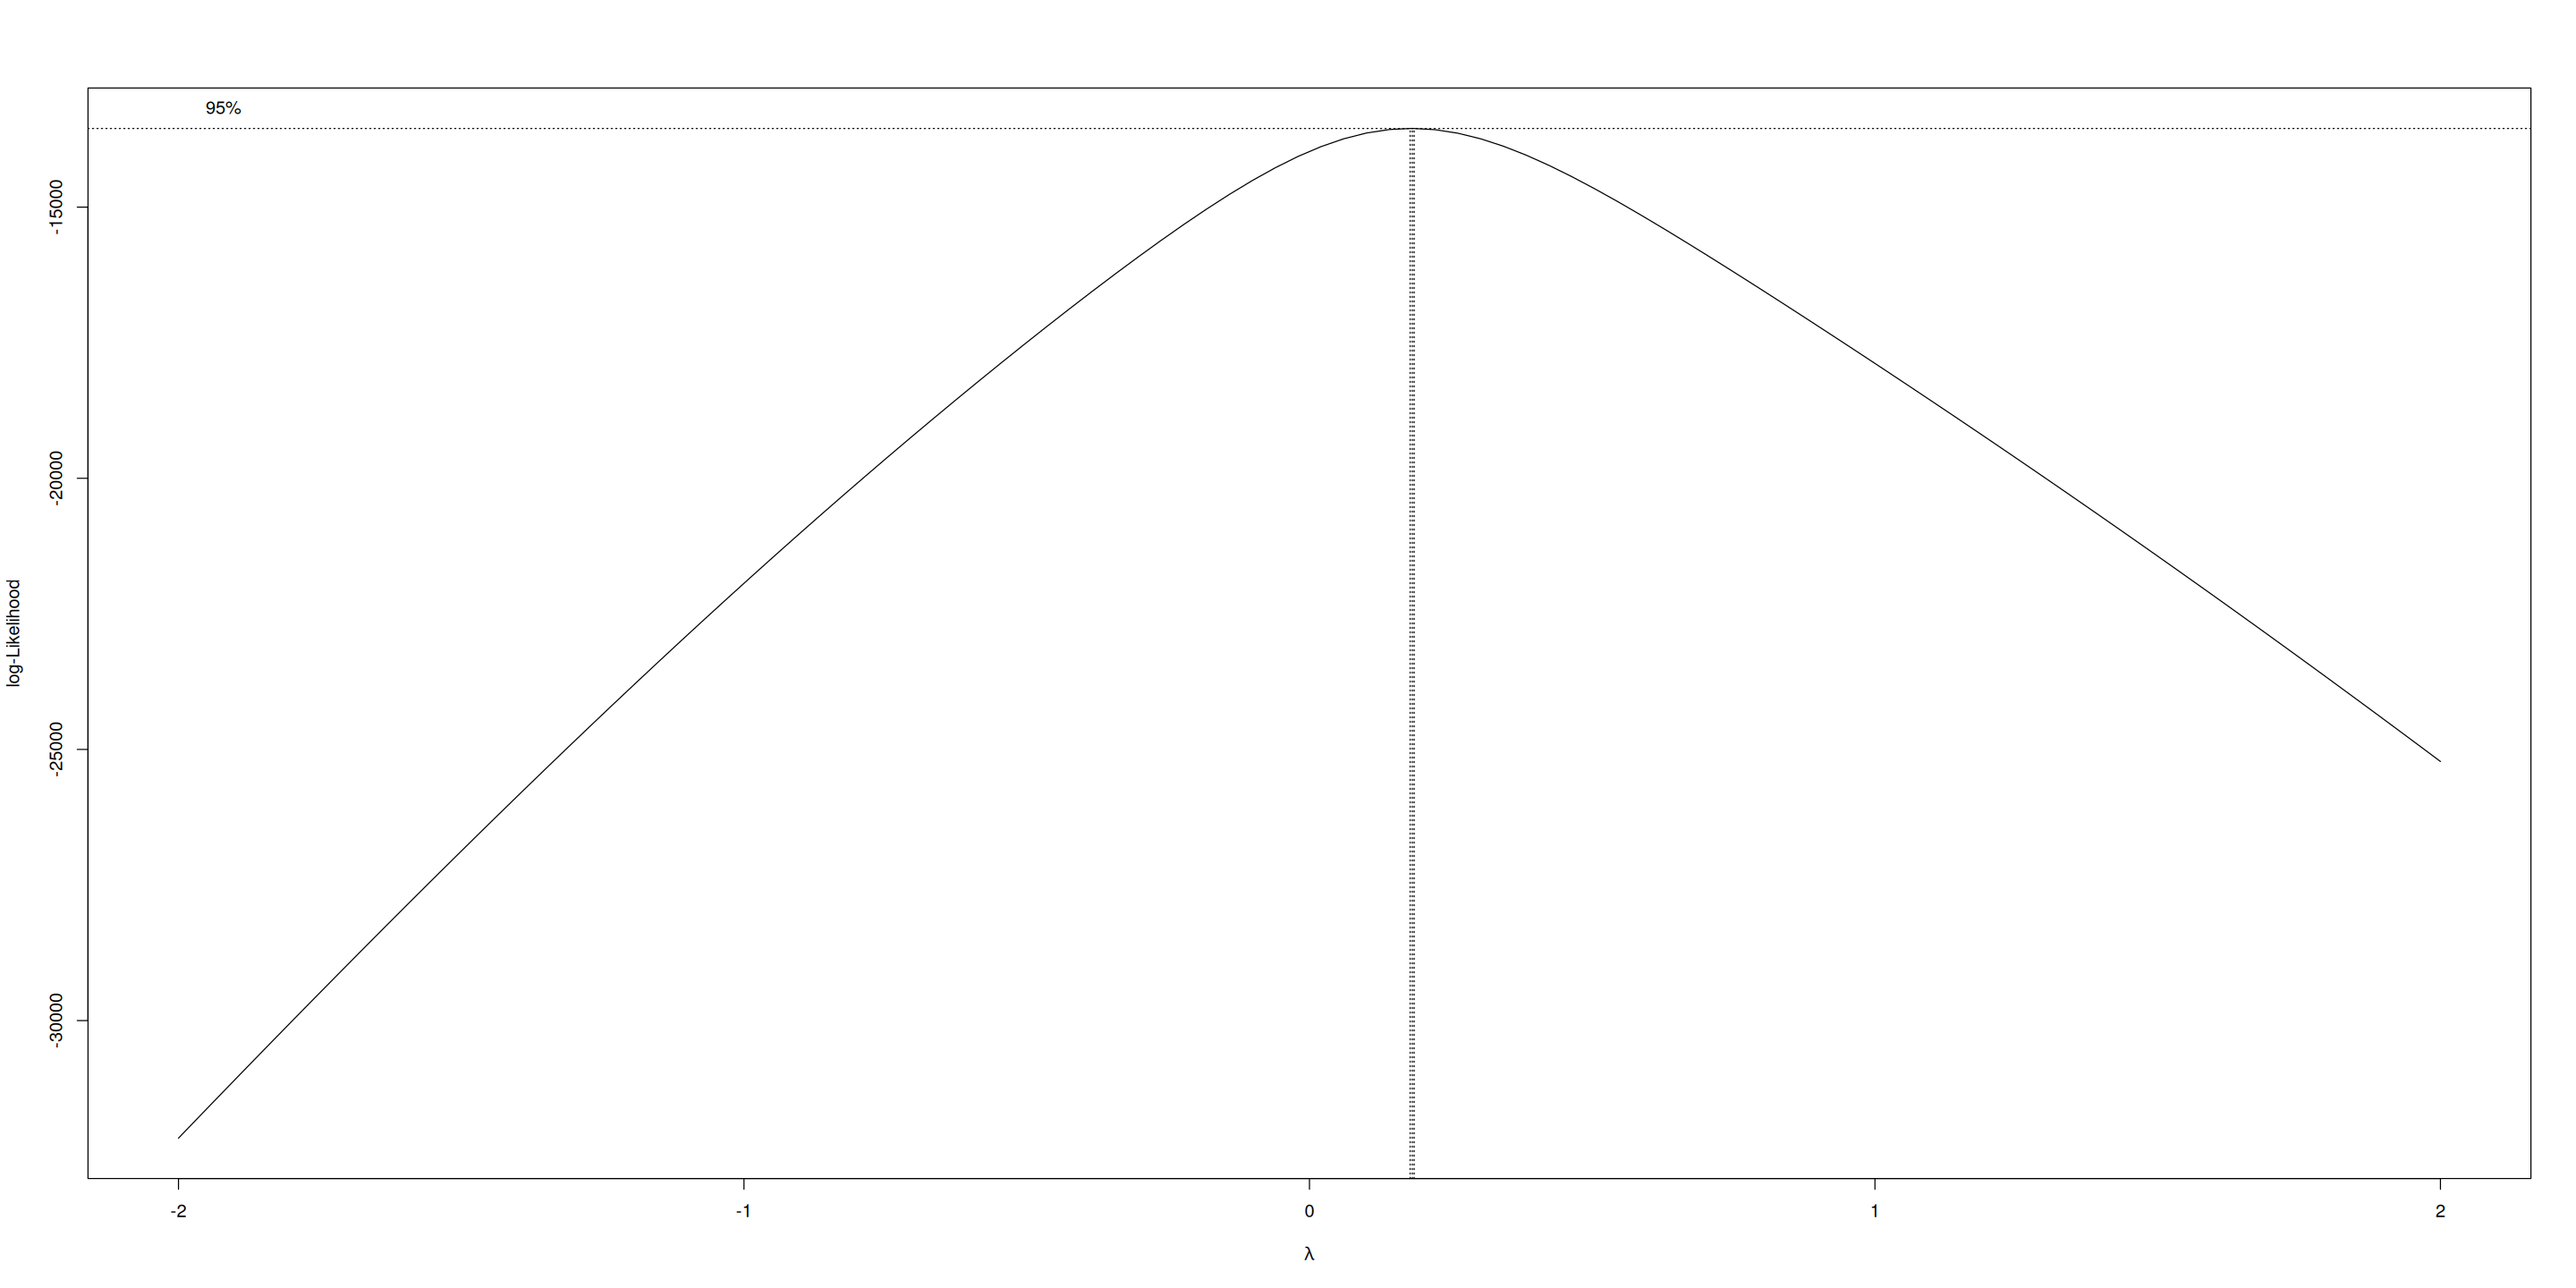

In [22]:
# Box Cox transformation
lambda <- BoxCox.lambda(bitcoin_data$Close)
cat("\nOptimal lambda for Box-Cox transformation:", lambda, "\n")
# Draw the Box-Cox transformation plot
par(bg = "white")
boxcox(bitcoin_data$Close ~ bitcoin_data$Date,
       lambda = seq(-2, 2, by = 0.1), plotit = TRUE)

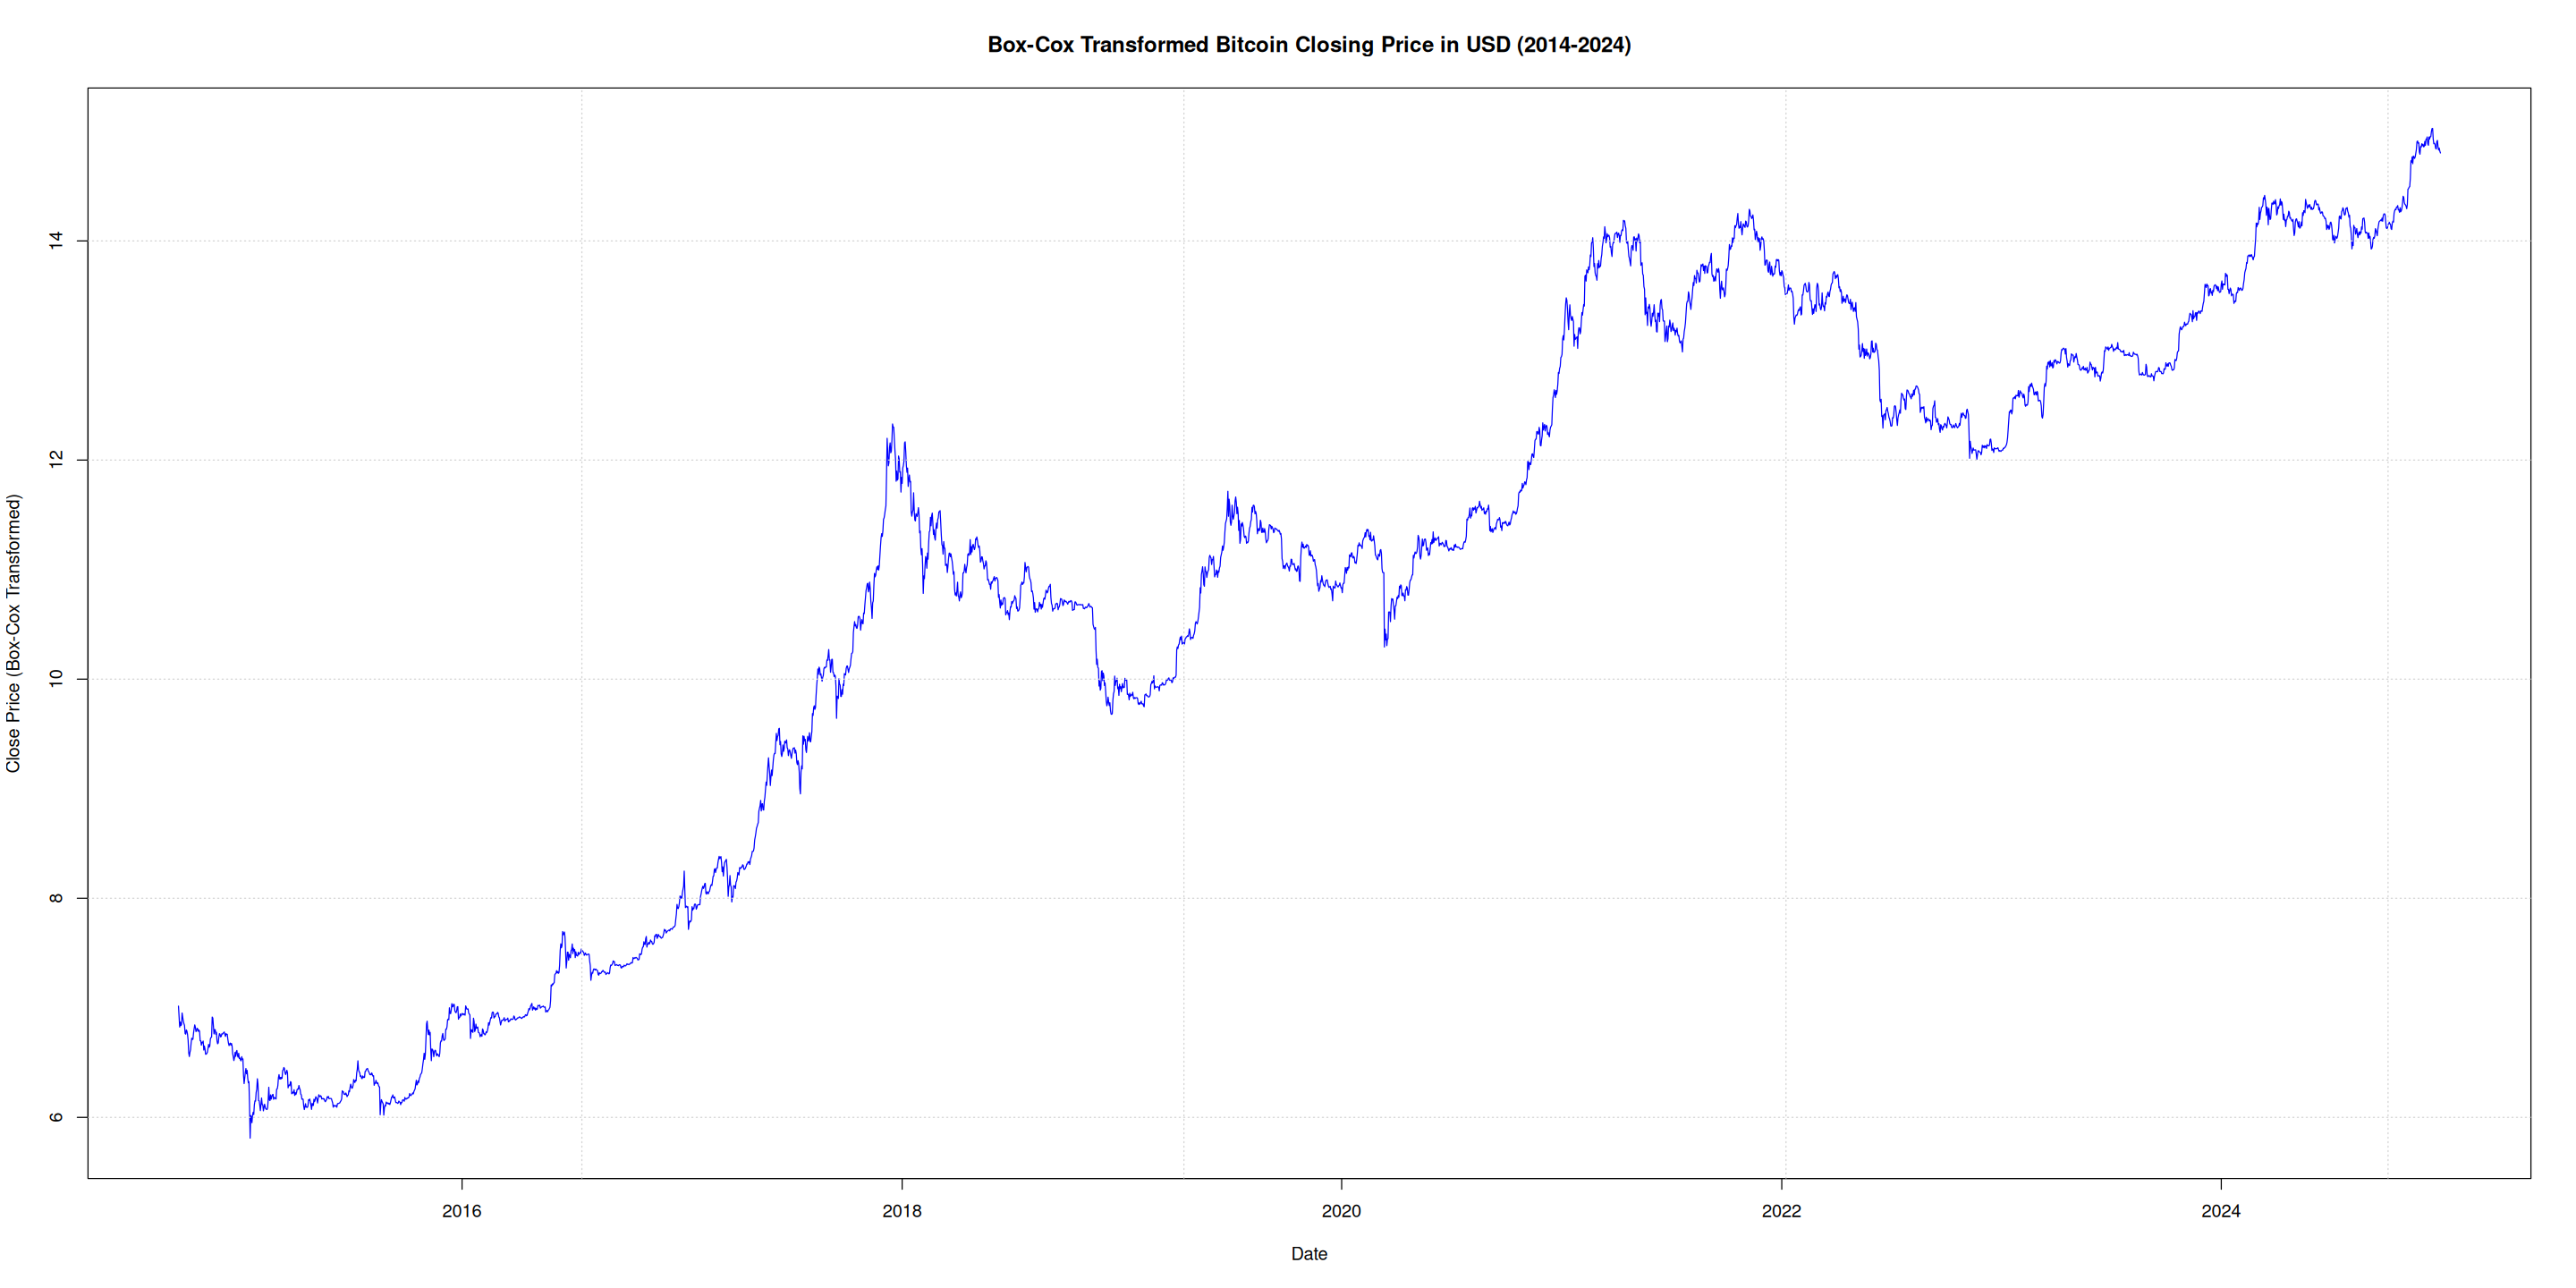

In [23]:
# Apply the Box-Cox transformationq
bitcoin_data$Close_boxcox <- BoxCox(bitcoin_data$Close, lambda)

# Plot the Box-Cox transformed series
par(bg = "white")
plot(bitcoin_data$Date, bitcoin_data$Close_boxcox, 
     type = "l",
     main = "Box-Cox Transformed Bitcoin Closing Price in USD (2014-2024)",
     xlab = "Date",
     ylab = "Close Price (Box-Cox Transformed)",
     col = "blue",
     lwd = 1)
grid()

In [24]:
# ADF test on transformed data
library(tseries)
adf.test(bitcoin_data$Close_boxcox)


	Augmented Dickey-Fuller Test

data:  bitcoin_data$Close_boxcox
Dickey-Fuller = -1.8949, Lag order = 15, p-value = 0.6229
alternative hypothesis: stationary


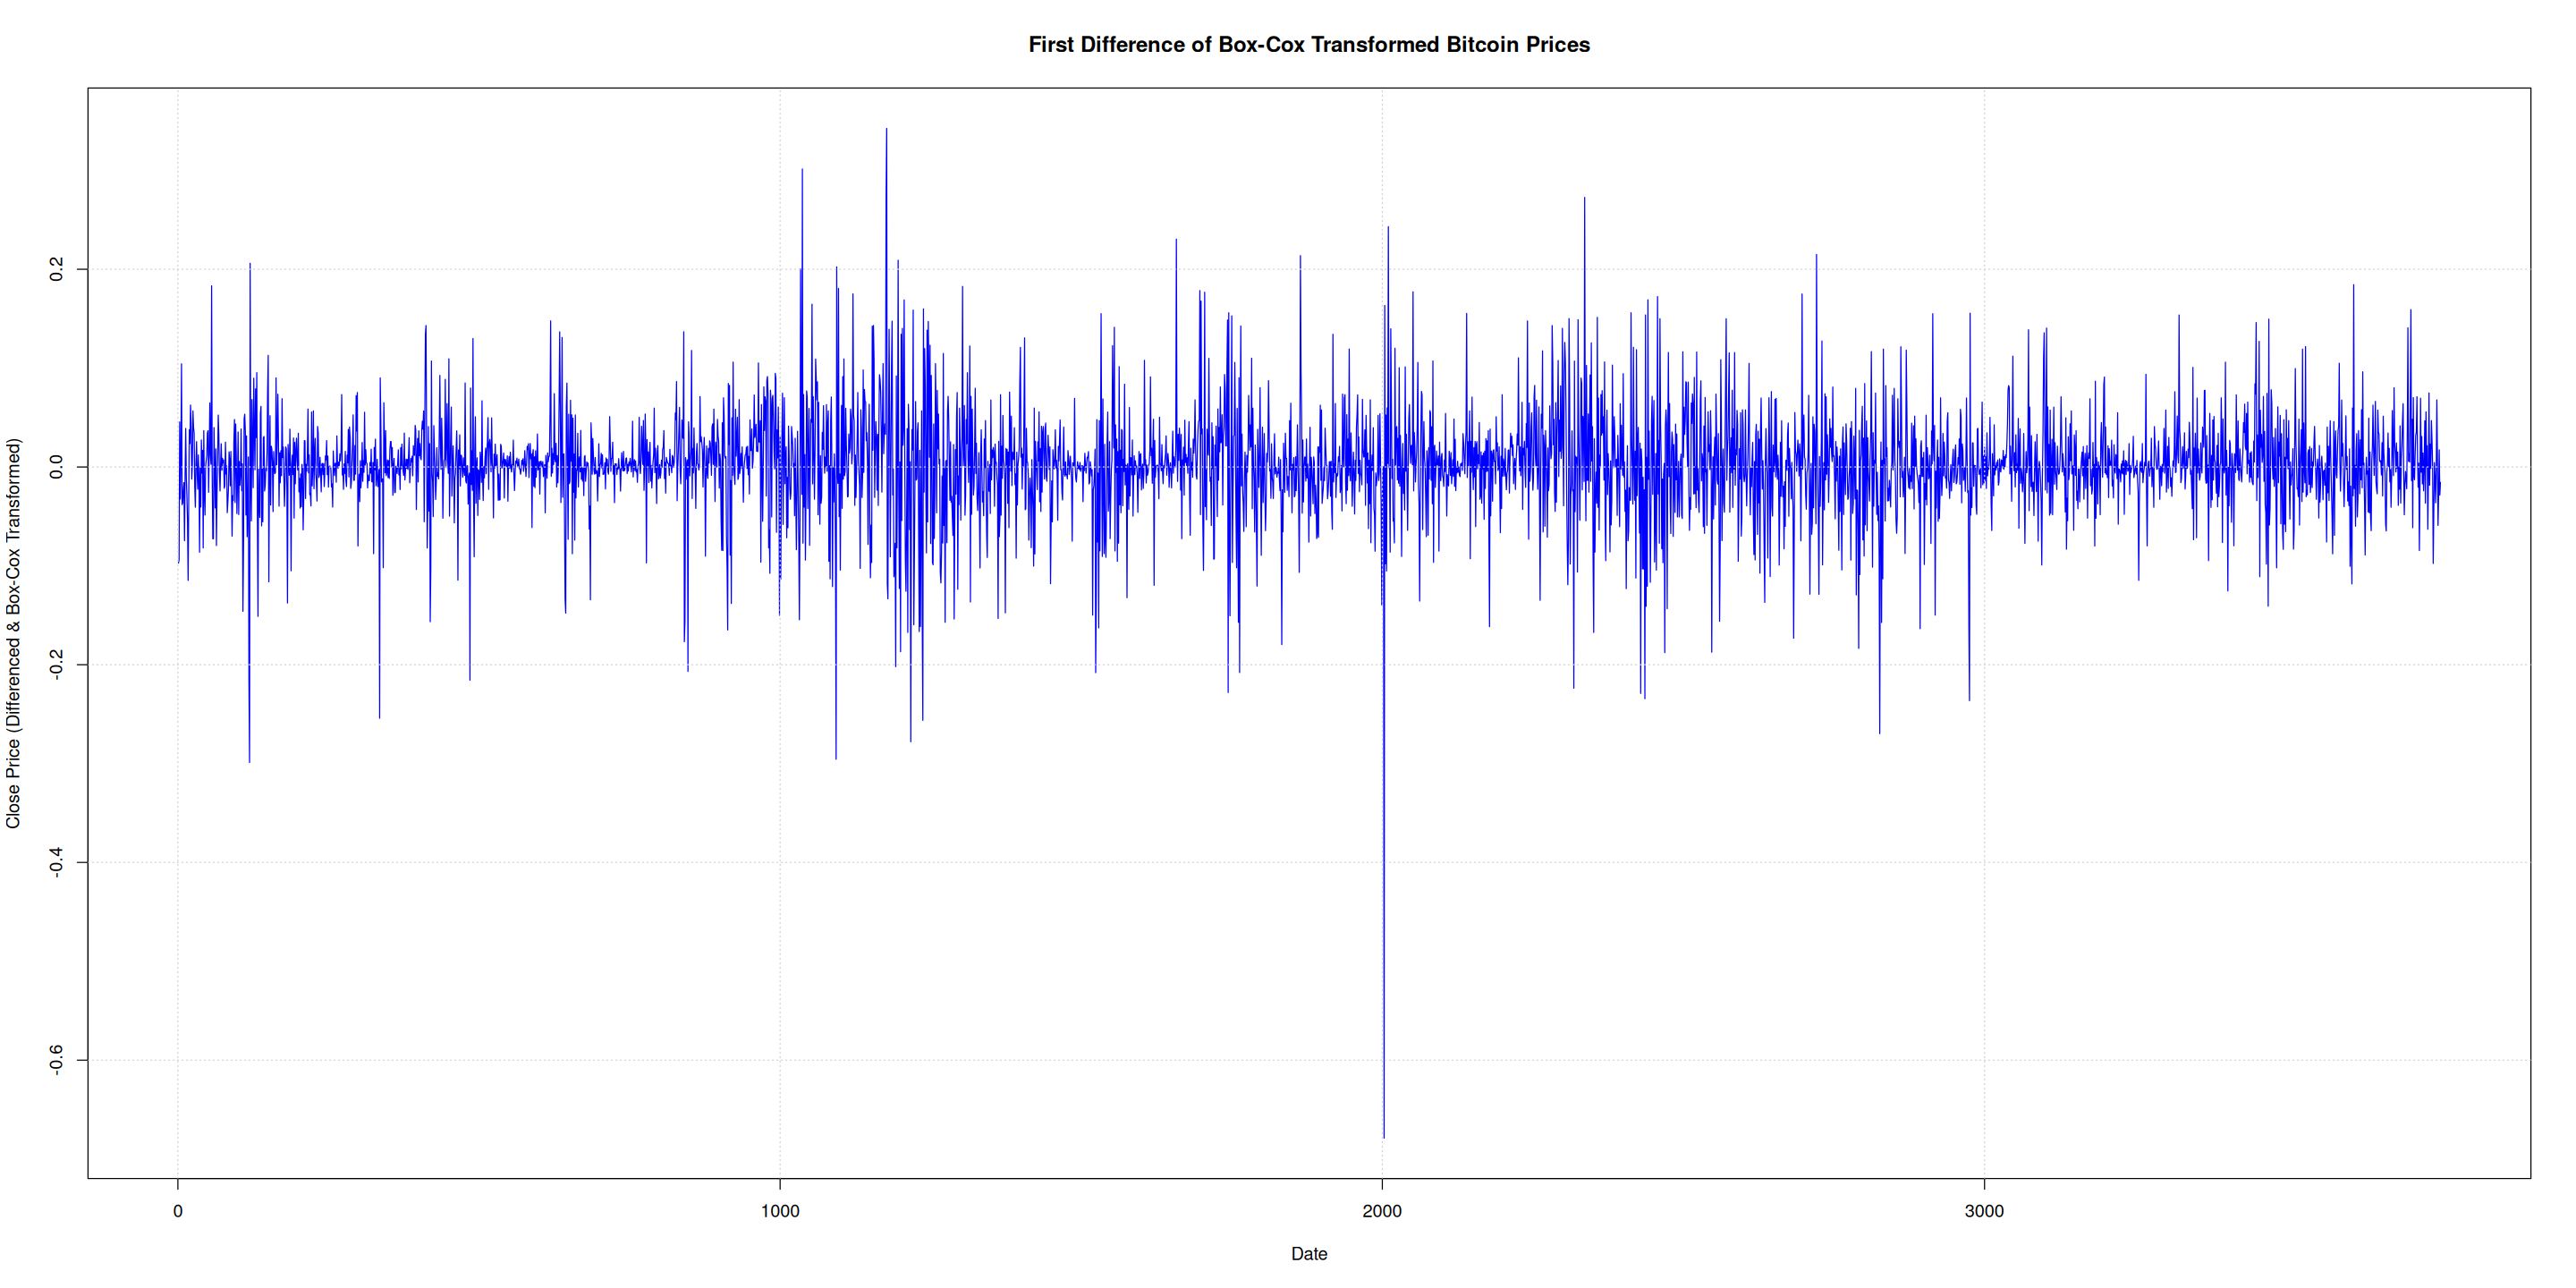

In [ ]:
# Plot the Box-Cox transformed series
par(bg = "white")
plot(bitcoin_diff,
     type = "l",
     main = "First Difference of Box-Cox Transformed Bitcoin Prices",
     xlab = "Date",
     ylab = "Close Price (Differenced & Box-Cox Transformed)",
     col = "blue",
     lwd = 1)
grid()

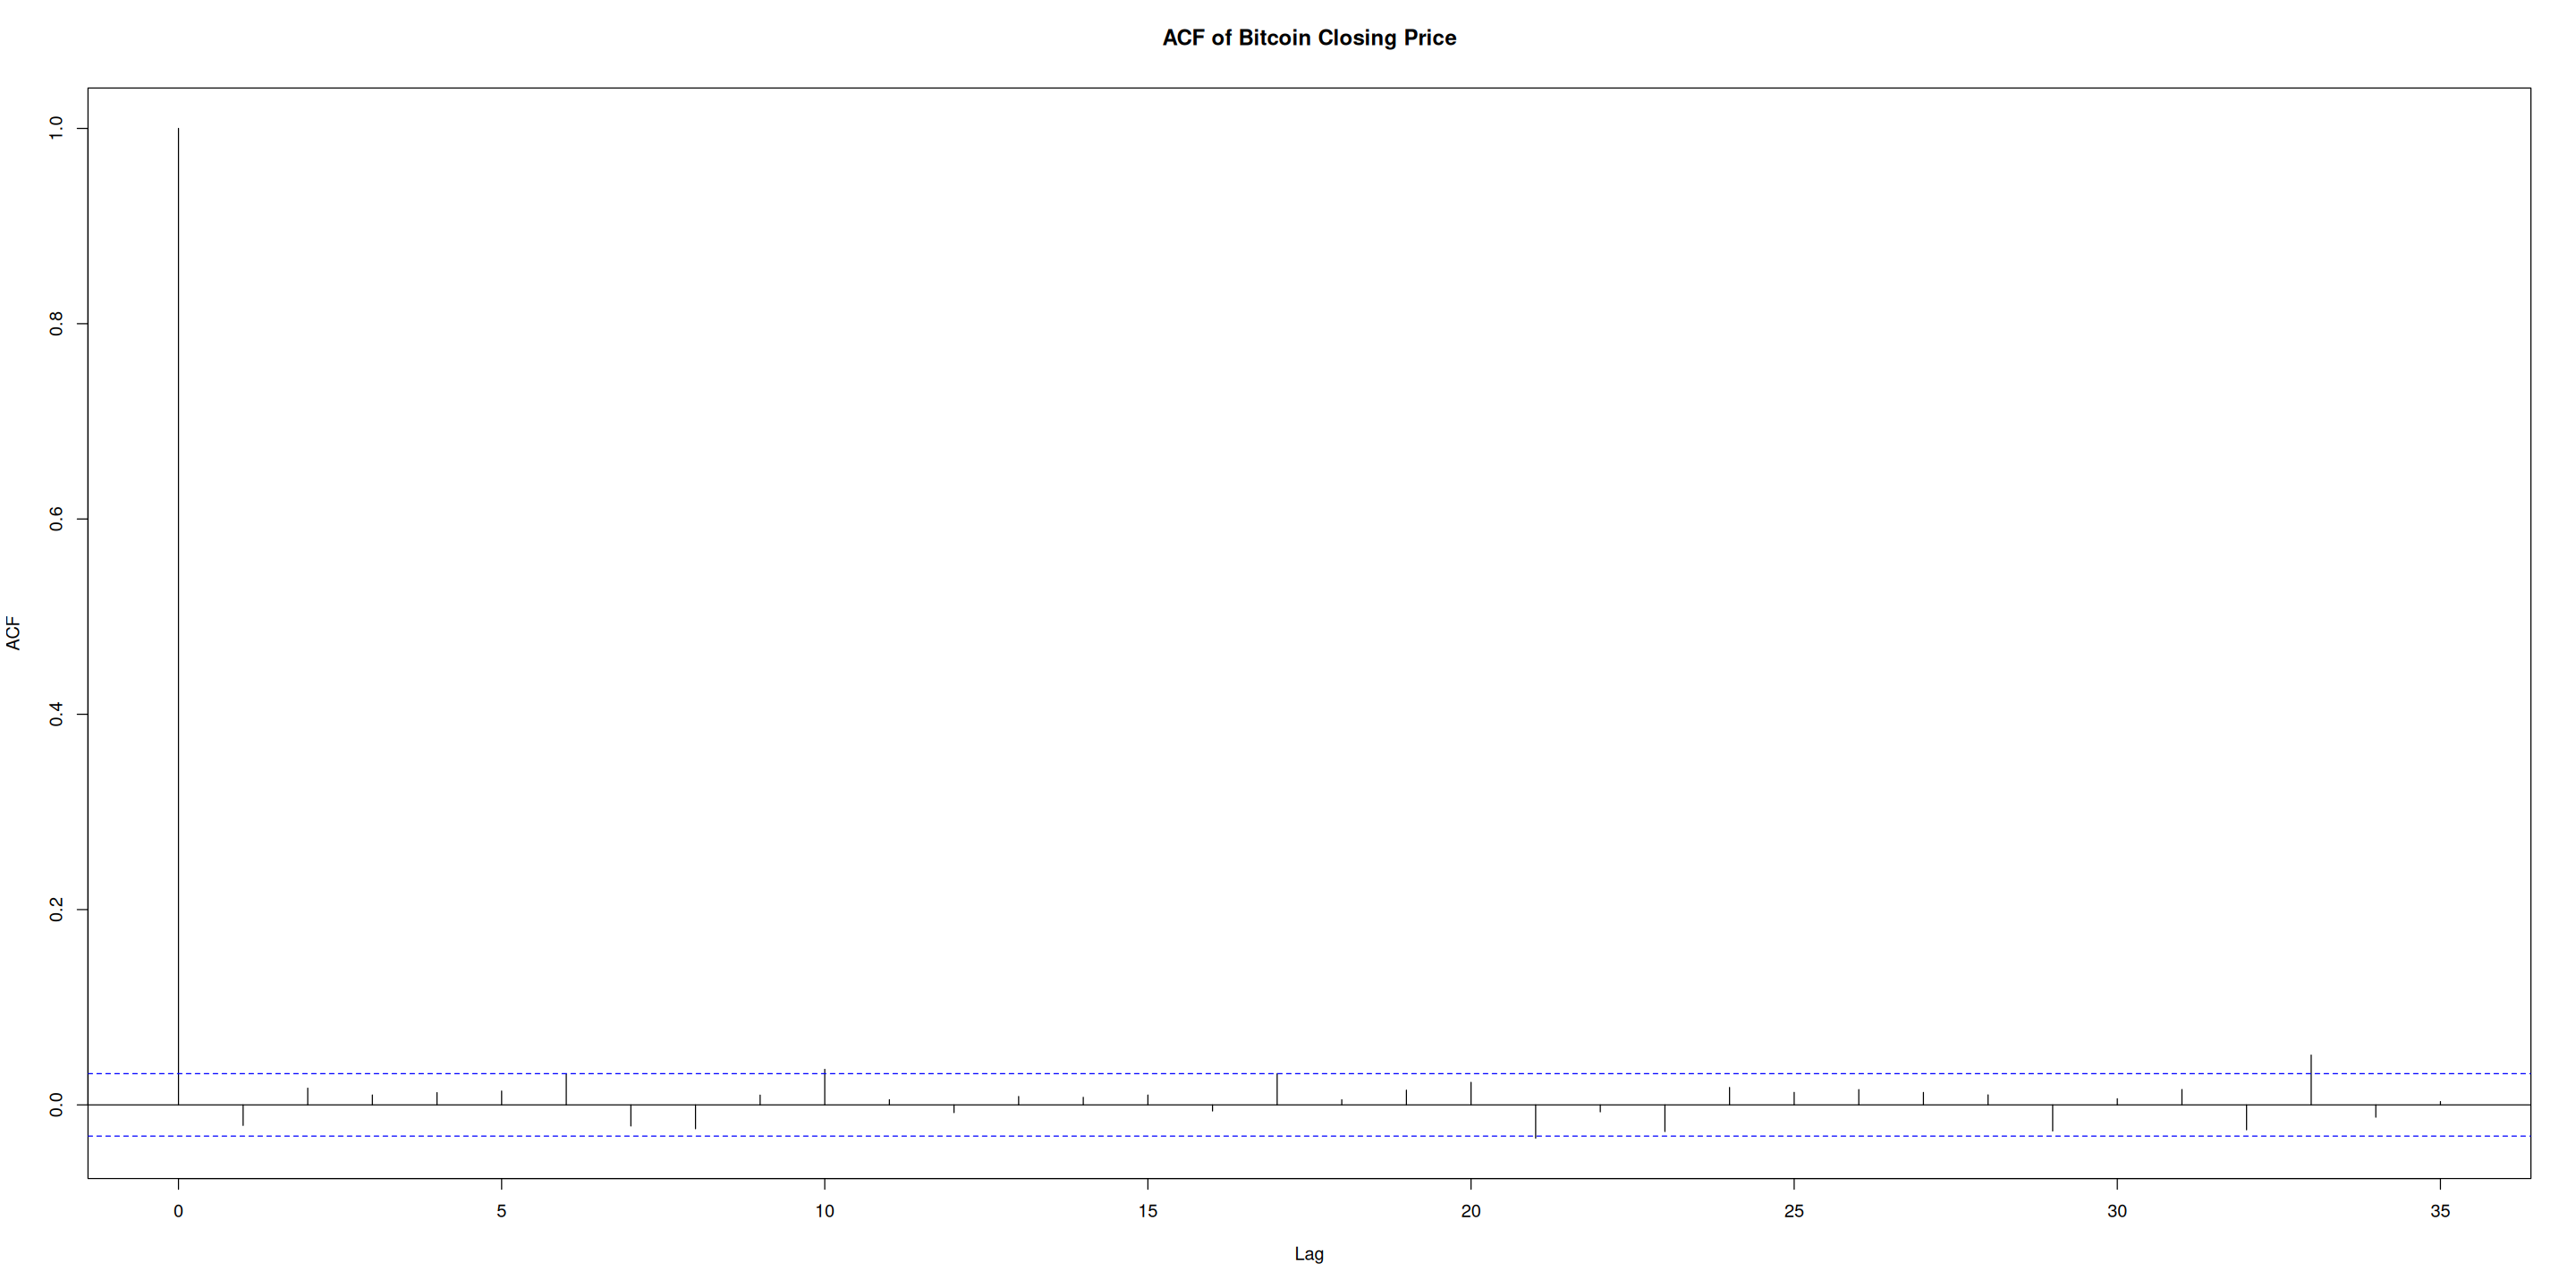

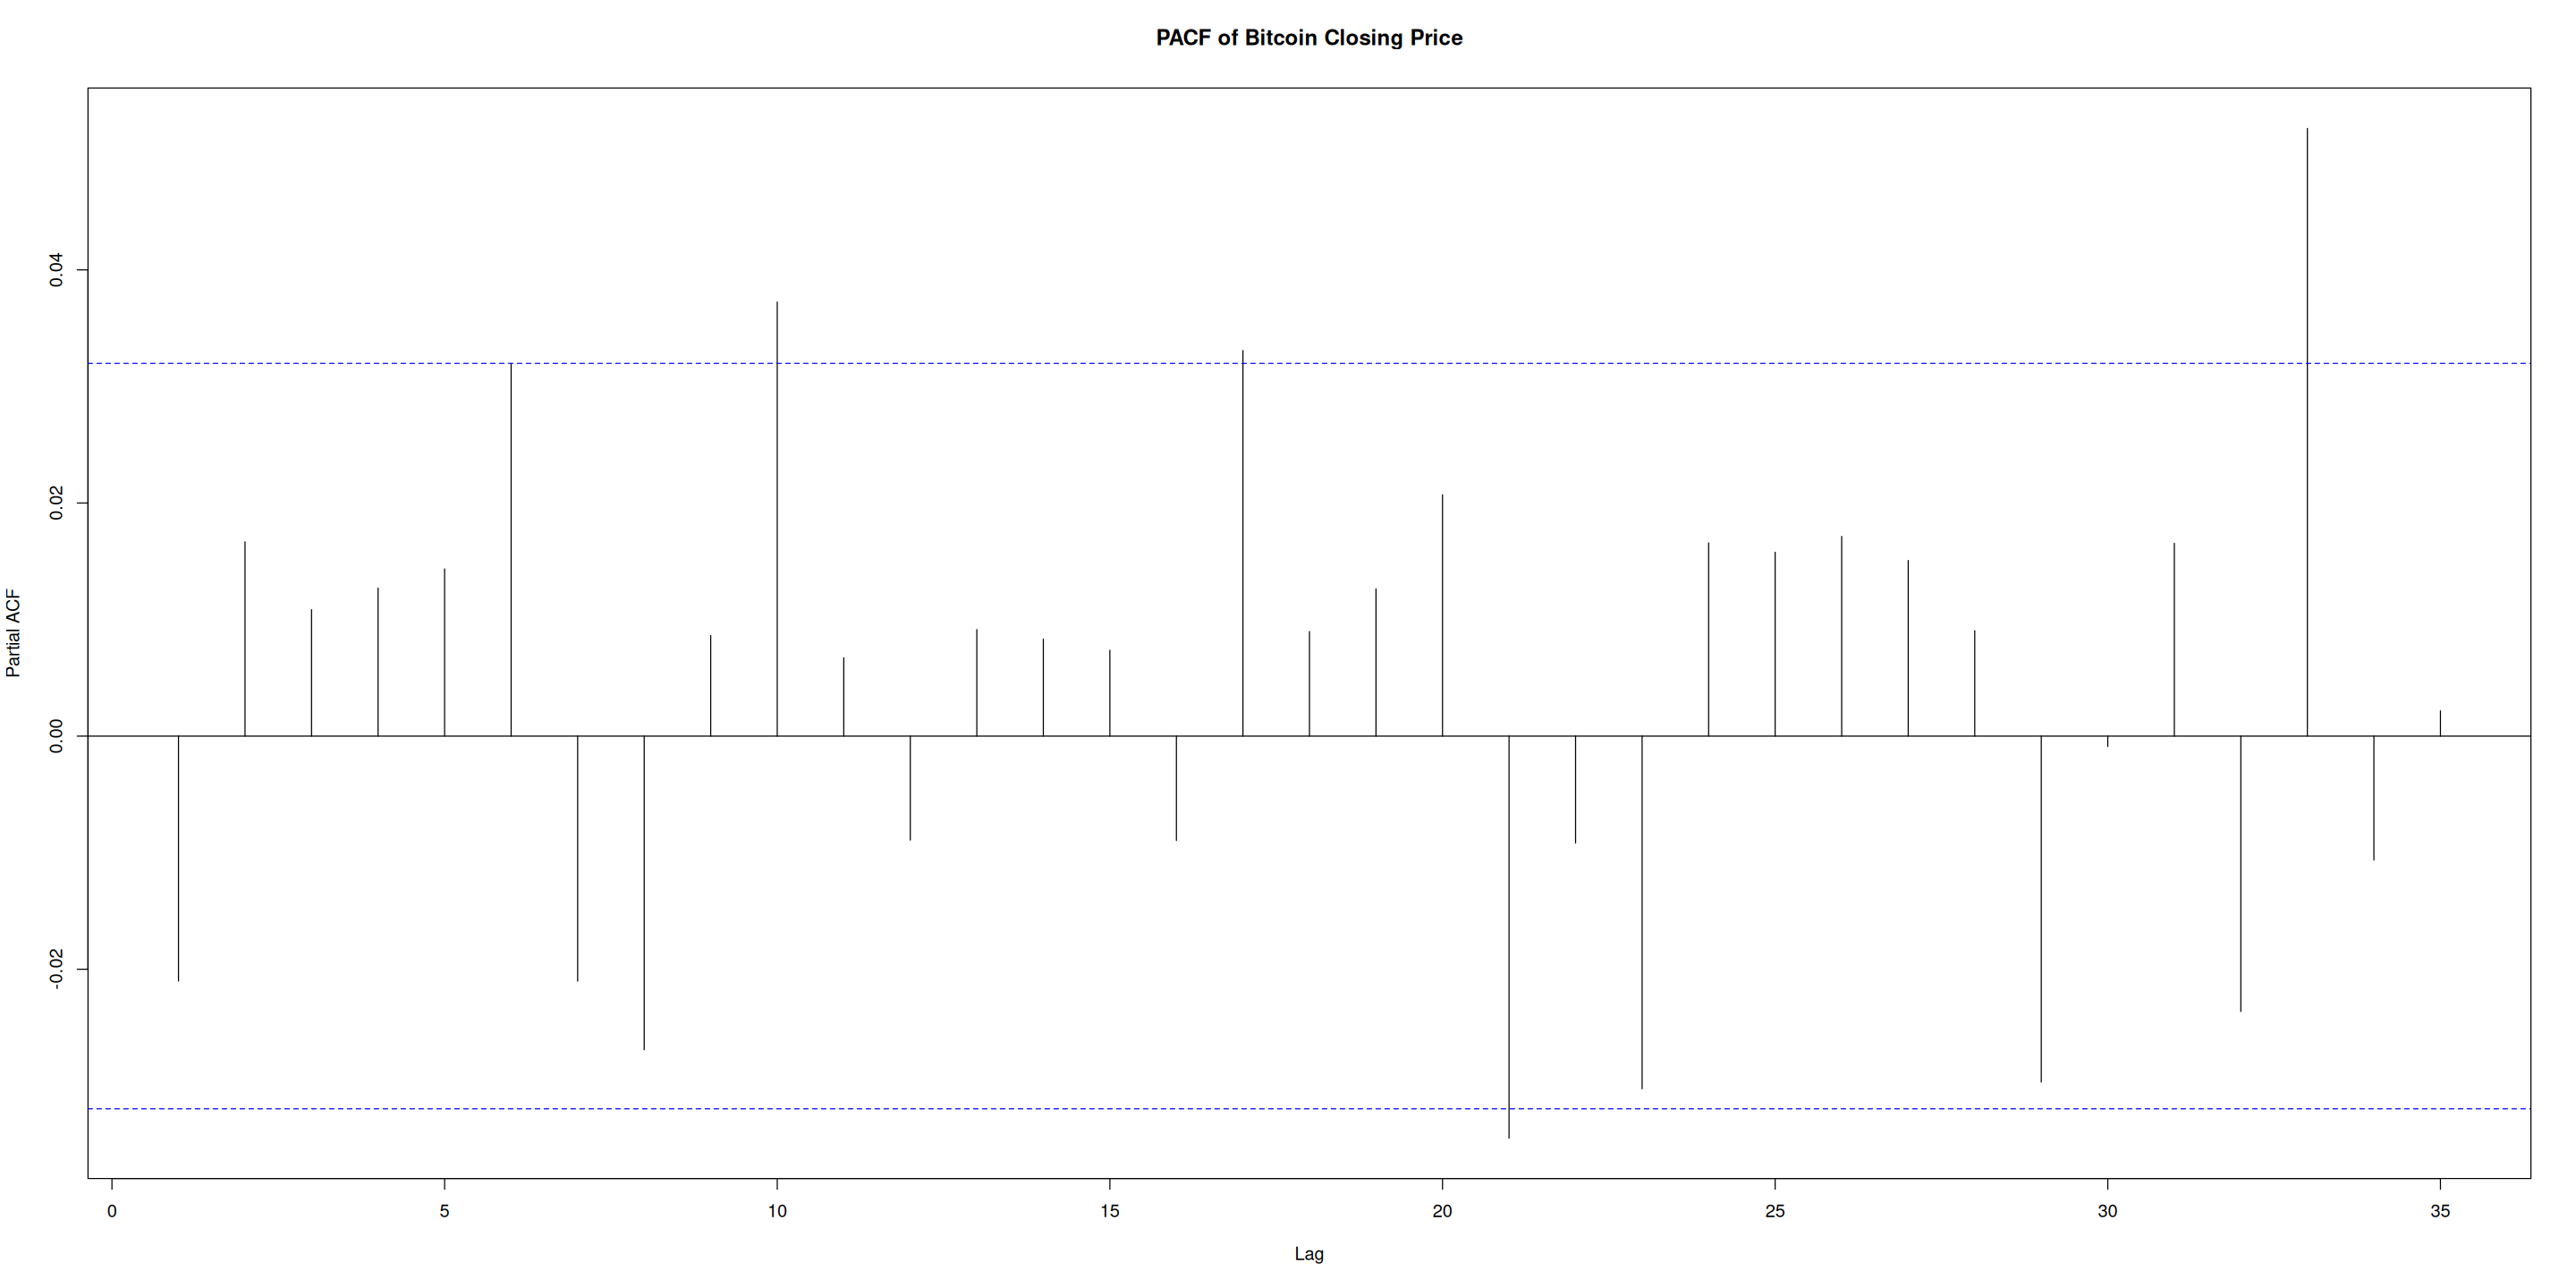

In [35]:
# ACF plot
par(bg = "white")
acf(bitcoin_diff, main = "ACF of Bitcoin Closing Price")
pacf(bitcoin_diff, main = "PACF of Bitcoin Closing Price")

In [36]:
library(forecast)

# Automatic model selection
auto_model <- auto.arima(bitcoin_data$Close_boxcox)
summary(auto_model)

# Manual model fitting based on ACF/PACF patterns
# For example:
model1 <- Arima(bitcoin_data$Close_boxcox, order=c(1,1,1))
model2 <- Arima(bitcoin_data$Close_boxcox, order=c(2,1,2))

# Compare models
AIC(model1, model2, auto_model)
BIC(model1, model2, auto_model)

Series: bitcoin_data$Close_boxcox 
ARIMA(2,1,0) with drift 

Coefficients:
          ar1     ar2   drift
      -0.0207  0.0167  0.0021
s.e.   0.0163  0.0163  0.0009

sigma^2 = 0.002881:  log likelihood = 5659.06
AIC=-11310.11   AICc=-11310.1   BIC=-11285.19

Training set error measures:
                        ME       RMSE        MAE          MPE      MAPE
Training set -3.471678e-06 0.05364646 0.03504316 -0.002087914 0.3352624
                  MASE          ACF1
Training set 0.9969455 -0.0002530472

,df,AIC
,<dbl>,<dbl>
model1,3,-11305.63
model2,5,-11302.50
auto_model,4,-11310.11


,df,BIC
,<dbl>,<dbl>
model1,3,-11286.94
model2,5,-11271.34
auto_model,4,-11285.19


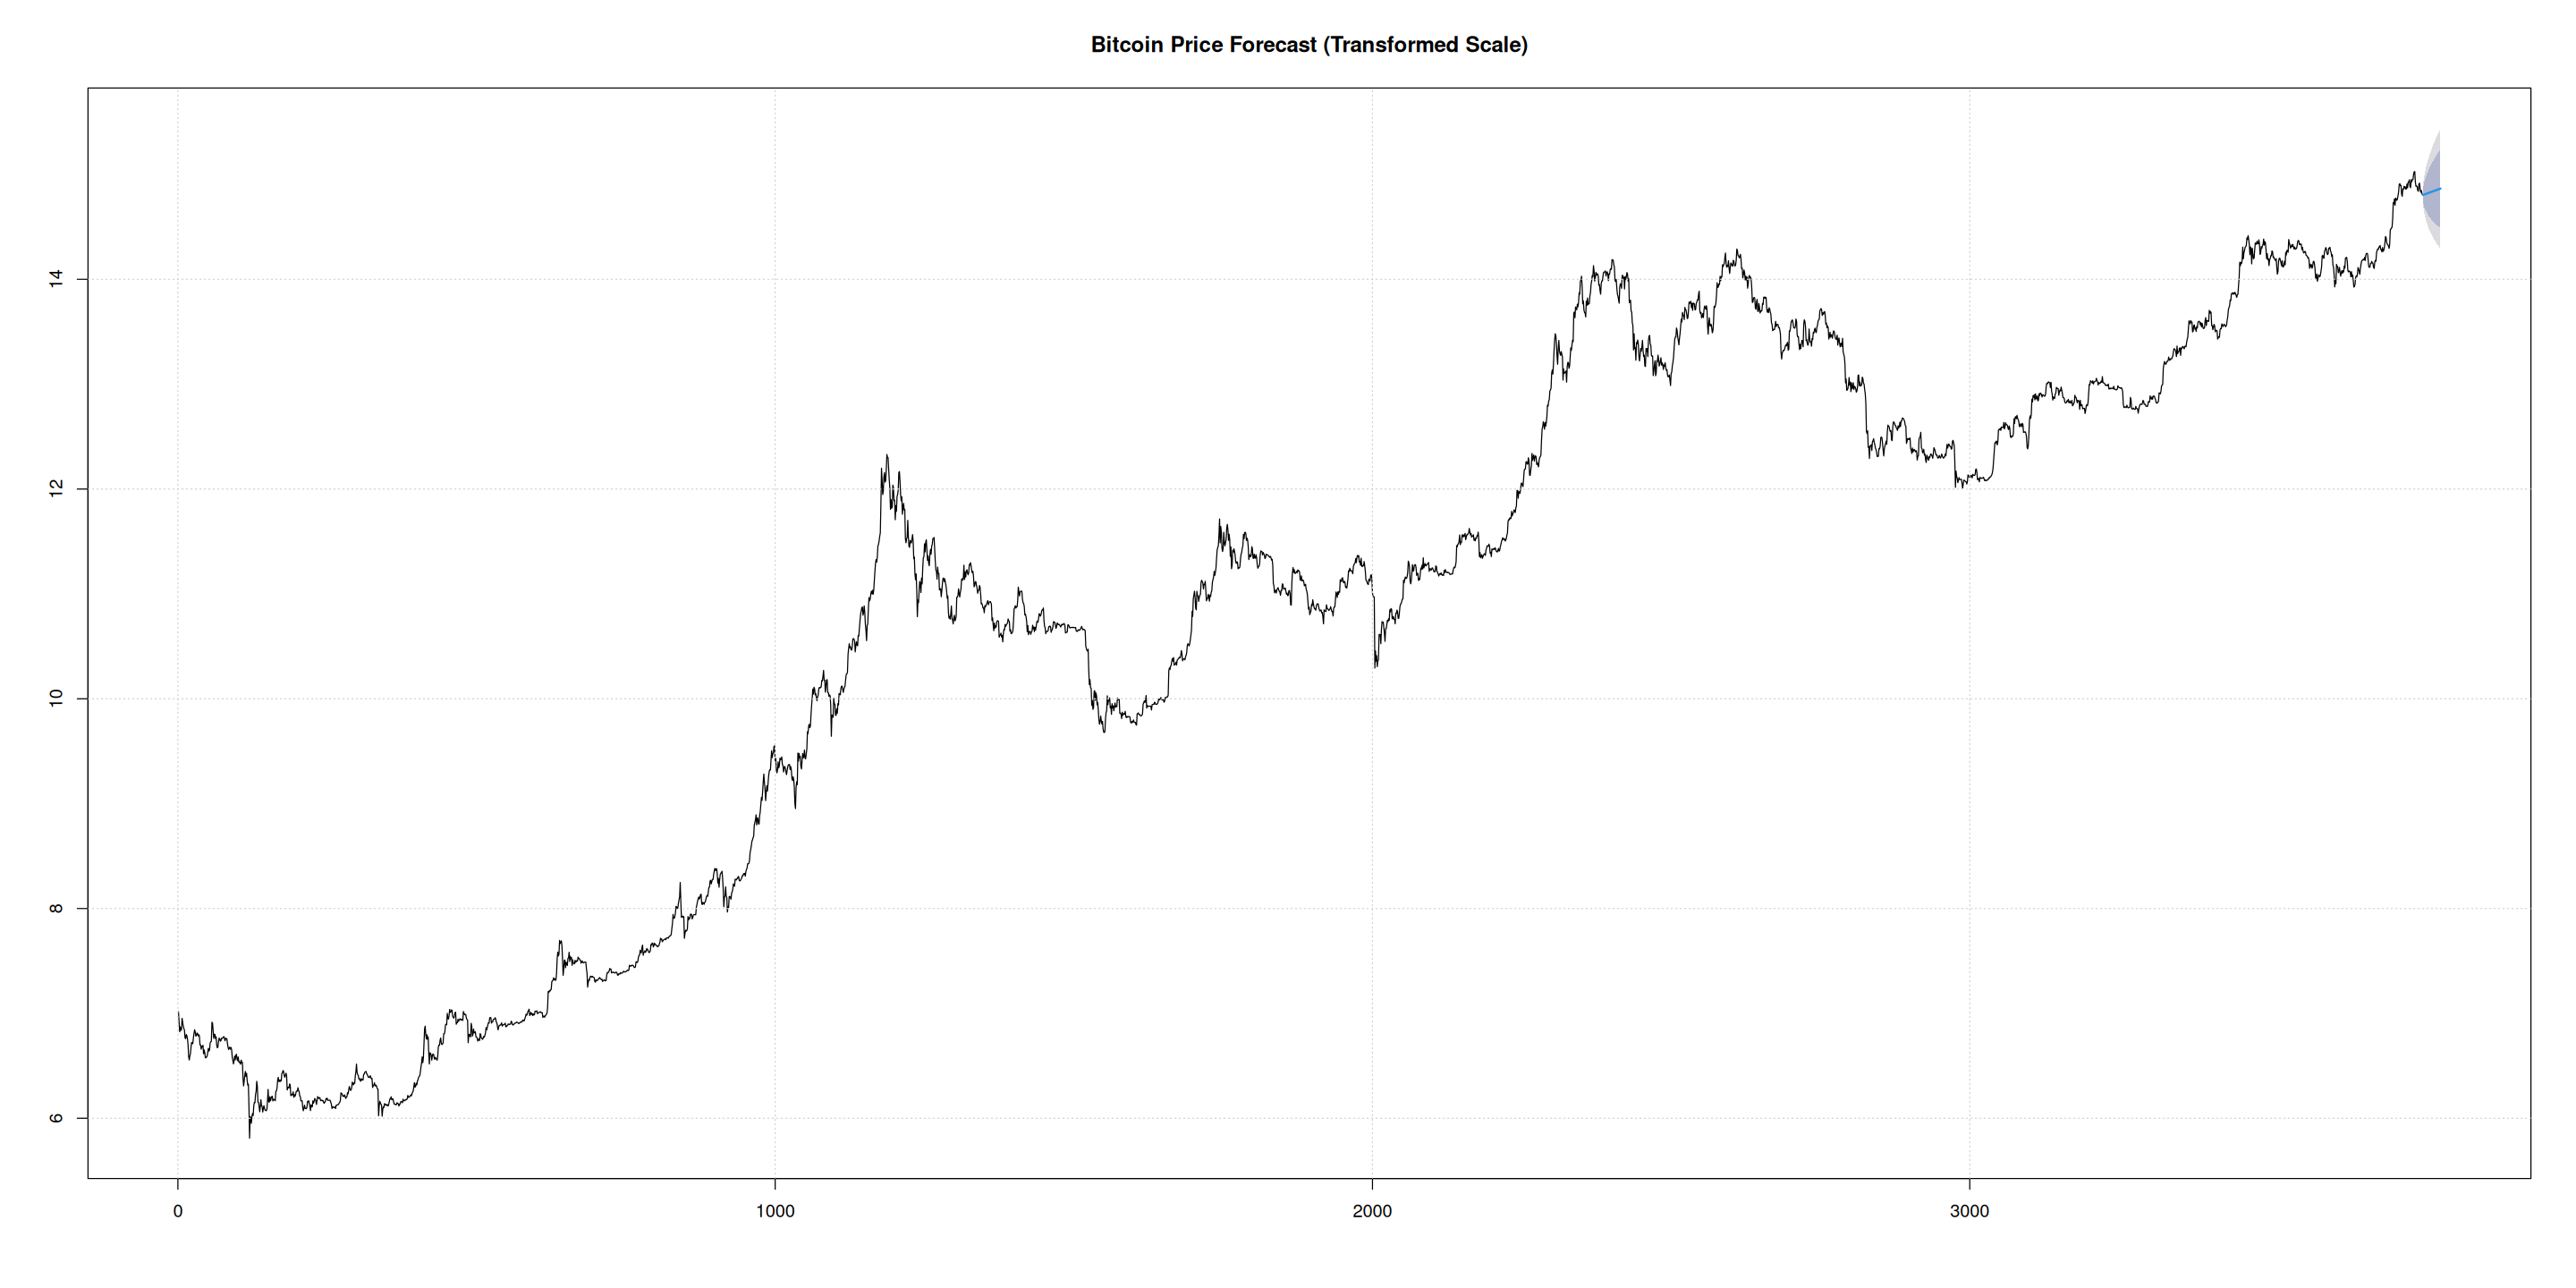

In [38]:
# Forecast future values
forecast_periods <- 30  # Adjust as needed
fc <- forecast(auto_model, h=forecast_periods)

# Plot forecast
par(bg = "white")
plot(fc, main="Bitcoin Price Forecast (Transformed Scale)")
grid()